# AdaBoost Classifier
In this notebook we will look at the application of AdaBoost Classifier for the classification of tumors as benign or malignant (using the [Breast Cancer Wisconsin Dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). This notebook will use the Sklearn library for the classifier. If you wish to learn more about the alogrithm's internal working, refer to [this](https://towardsdatascience.com/machine-learning-part-17-boosting-algorithms-adaboost-in-python-d00faac6c464) well-written medium article.

In [2]:
#Importing the required libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,ConfusionMatrixDisplay
from ipywidgets import interactive
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Loading the data and getting the train-test splits
cancer =  datasets.load_breast_cancer()
X,y = pd.DataFrame(cancer.data,columns=cancer.feature_names),pd.DataFrame(cancer.target,columns=['label'])
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)
print("Size of train set: ",len(X_train))
print("Size of test set: ", len(X_test))
print("Sample training data:")
pd.concat((X_train,y_train),axis=1).head(6)

Size of train set:  426
Size of test set:  143
Sample training data:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.255000,0.094290,0.2128,0.07152,...,42.79,128.70,915.0,0.14170,0.79170,1.17000,0.23560,0.4089,0.14090,0
291,14.96,19.10,97.03,687.3,0.08992,0.09823,0.059400,0.048190,0.1879,0.05852,...,26.19,109.10,809.8,0.13130,0.30300,0.18040,0.14890,0.2962,0.08472,1
16,14.68,20.13,94.74,684.5,0.09867,0.07200,0.073950,0.052590,0.1586,0.05922,...,30.88,123.40,1138.0,0.14640,0.18710,0.29140,0.16090,0.3029,0.08216,0
546,10.32,16.35,65.31,324.9,0.09434,0.04994,0.010120,0.005495,0.1885,0.06201,...,21.77,71.12,384.9,0.12850,0.08842,0.04384,0.02381,0.2681,0.07399,1
293,11.85,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,0.1875,0.05715,...,25.75,84.35,517.8,0.13690,0.17580,0.13160,0.09140,0.3101,0.07007,1
350,11.66,17.07,73.70,421.0,0.07561,0.03630,0.008306,0.011620,0.1671,0.05731,...,19.74,83.61,542.5,0.09958,0.06476,0.03046,0.04262,0.2731,0.06825,1


#### Important
In the other notebooks you may have noticed that we scale/normalize the training data before feeding it to the model. However such pre-processing is not necessary if we are using Decision Tree Classifiers as the model because they don't involve any linear equations/ arithmetic on the features themselves.

In [4]:
#Training the classifier
classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
classifier.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

Accuracy:  0.965034965034965
Macro F1 score:  0.9629399263981755


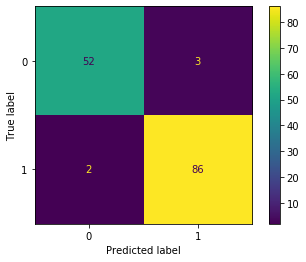

In [5]:
#Evaluating the model on test data
y_pred = classifier.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,y_pred))
print("Macro F1 score: ", f1_score(y_test,y_pred,average='macro'))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Interactive
We'll now experiment with varying the maximum depth and number of estimators of the individual decision tree classifier in the ensemble, and compare the results with a single decision tree classifier of the same maximum depth

In [6]:
def vary_max_depth(depth,num_trees):
    classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth),n_estimators=num_trees)
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    print("Accuracy for AdaBoost: ", accuracy_score(y_test,y_pred))
    print("Macro F1 score for AdaBoost: ", f1_score(y_test,y_pred,average='macro'))
    classifier_d = DecisionTreeClassifier(max_depth=depth)
    classifier_d.fit(X_train,y_train)
    y_pred_d = classifier_d.predict(X_test)
    print("Accuracy for a Decision Tree: ", accuracy_score(y_test,y_pred_d))
    print("Macro F1 score for a Decision Tree: ", f1_score(y_test,y_pred_d,average='macro'))

In [7]:
inter=interactive(vary_max_depth , depth=[1,2,3,4,5,6,7,8,9,10], num_trees=[1,2,10,20,50,100,200])
display(inter)

interactive(children=(Dropdown(description='depth', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), value=1), Dropdow…